# CNN with tensorflow/keras for fashion MNIST 

### Load Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

Using TensorFlow backend.


### Importing dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

### Creating labels

In [6]:
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

### Visualizing data

In [7]:
# Plot sample images
def plot_samples(data_img, data_lbl):
    f, ax = plt.subplots(5,8, figsize=(16,10))
    for i, img in enumerate(data_img[0:40]):
        ax[i//8, i%8].imshow(img)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_lbl[i]])
    plt.show()  

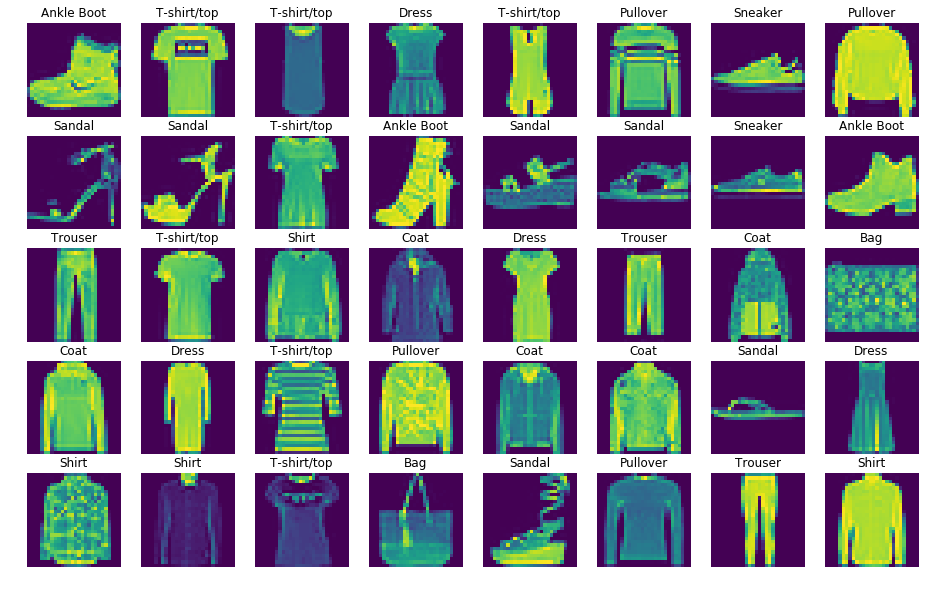

In [8]:
plot_samples(train_images, train_labels)

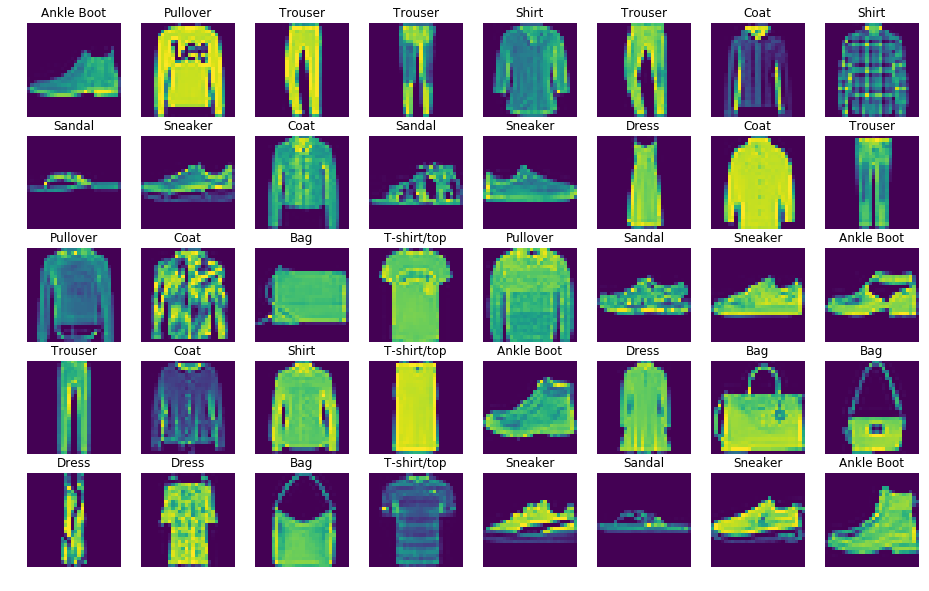

In [9]:
plot_samples(test_images, test_labels)

### Data preprocessing

In [10]:
X_data = train_images/255.0
X_test = test_images/255.0

X_data = X_data.reshape(X_data.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

y = to_categorical(train_labels, num_classes = 10)
y_test = to_categorical(test_labels, num_classes = 10)

### Splitting data into train and validation set

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y, test_size=0.2, random_state=1)

print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST valid -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28, 1)
Fashion MNIST valid -  rows: 12000  columns: (28, 28, 1)
Fashion MNIST test -  rows: 10000  columns: (28, 28, 1)


### Creating Model

In [12]:
# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))

# Step 2 - Pooling and dropout
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Adding a second convolutional layer
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.3))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 10, activation = 'softmax'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

### Training the model

In [14]:
train_model = model.fit(X_train, y_train,
                  batch_size=128,
                  epochs=25,
                  verbose=1,
                  validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 47s 970us/step - loss: 0.7393 - acc: 0.7258 - val_loss: 0.4604 - val_acc: 0.8276
Epoch 2/25
48000/48000 [==============================] - 51s 1ms/step - loss: 0.4602 - acc: 0.8299 - val_loss: 0.3750 - val_acc: 0.8585
Epoch 3/25
48000/48000 [==============================] - 47s 972us/step - loss: 0.3942 - acc: 0.8550 - val_loss: 0.3280 - val_acc: 0.8772
Epoch 4/25
48000/48000 [==============================] - 52s 1ms/step - loss: 0.3569 - acc: 0.8712 - val_loss: 0.3100 - val_acc: 0.8840
Epoch 5/25
48000/48000 [==============================] - 53s 1ms/step - loss: 0.3306 - acc: 0.8791 - val_loss: 0.2839 - val_acc: 0.8958
Epoch 6/25
48000/48000 [==============================] - 52s 1ms/step - loss: 0.3113 - acc: 0.8863 - val_loss: 0.2859 - val_acc: 0.8944
Epoch 7/25
48000/48000 [==============================] - 52s 1ms/step - loss: 0.2979 - acc: 0.8912 - val_loss: 0.2679 - val

### Loss and accuracy

In [15]:
# Loss and accuracy on test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.23780698751211166
Test accuracy: 0.9165


### Plot loss and accuracy for train and validation set

In [16]:
# plot loss and accuracy for training and validation
def create_trace(x,y,ylabel,color):
        trace = go.Scatter(
            x = x,y = y,
            name=ylabel,
            marker=dict(color=color),
            mode = "markers+lines",
            text=x
        )
        return trace
    
def plot_accuracy_and_loss(train_model):
    hist = train_model.history
    acc = hist['acc']
    val_acc = hist['val_acc']
    loss = hist['loss']
    val_loss = hist['val_loss']
    epochs = list(range(1,len(acc)+1))
    
    trace_ta = create_trace(epochs,acc,"Training accuracy", "Green")
    trace_va = create_trace(epochs,val_acc,"Validation accuracy", "Red")
    trace_tl = create_trace(epochs,loss,"Training loss", "Blue")
    trace_vl = create_trace(epochs,val_loss,"Validation loss", "Magenta")
   
    fig = tools.make_subplots(rows=1,cols=2, subplot_titles=('Training and validation accuracy',
                                                             'Training and validation loss'))
    fig.append_trace(trace_ta,1,1)
    fig.append_trace(trace_va,1,1)
    fig.append_trace(trace_tl,1,2)
    fig.append_trace(trace_vl,1,2)
    fig['layout']['xaxis'].update(title = 'Epoch')
    fig['layout']['xaxis2'].update(title = 'Epoch')
    fig['layout']['yaxis'].update(title = 'Accuracy', range=[0,1])
    fig['layout']['yaxis2'].update(title = 'Loss', range=[0,1])

    
    iplot(fig, filename ='accuracy-loss')

In [17]:
plot_accuracy_and_loss(train_model)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



### Make predictions and visualize

In [18]:
predictions = model.predict_classes(X_test)

In [20]:
correct = np.nonzero(predictions==test_labels)[0]
incorrect = np.nonzero(predictions!=test_labels)[0]

In [23]:
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(16,10))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(test_images[indx], cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[test_labels[indx]],labels[predictions[indx]]))
    plt.show()    

#### Correct predictions

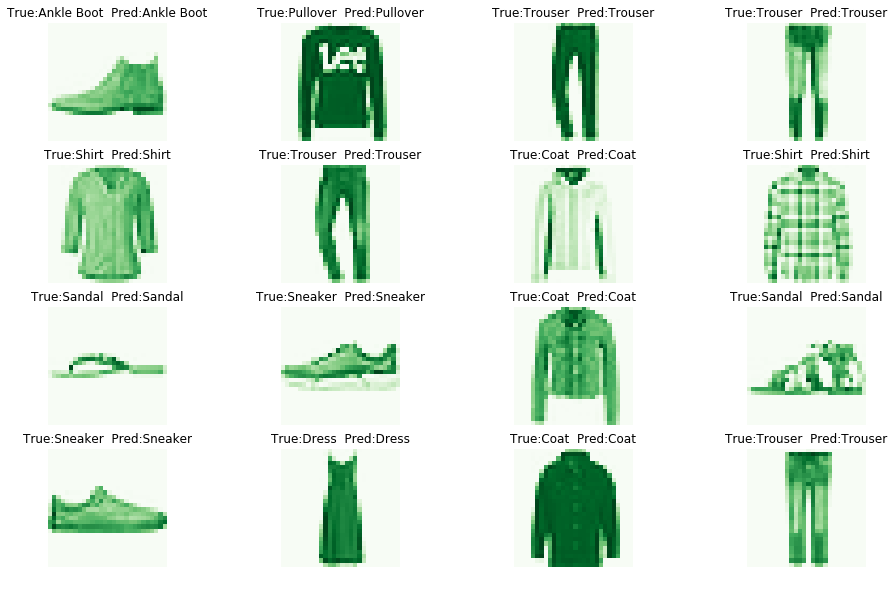

In [24]:
plot_images(correct, "Greens")

#### Incorrect predictions

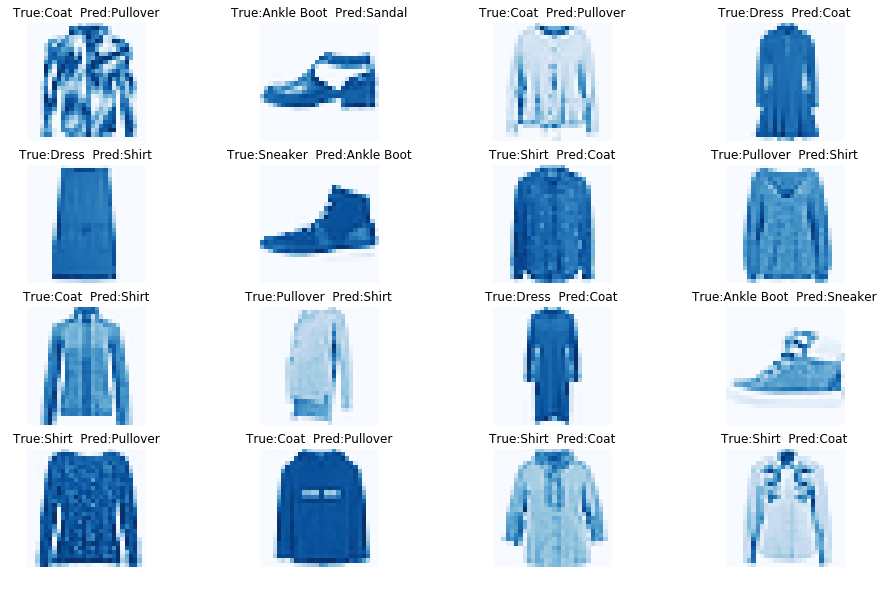

In [25]:
plot_images(incorrect)